In [16]:
#Ultimate Technologies Inc. Take-Home Challenge

In [58]:
#Imports
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import datetime

In [59]:
df = pd.read_json('ultimate_challenge/logins.json')

In [60]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [62]:
#Part 1 Exploratory Data Analysis 

In [63]:
df.set_index('login_time', inplace=True)
df['count'] = 1
df.sort_index(inplace=True)
df_agg = df.resample("15min").sum()

In [64]:
df_agg

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [65]:
df_agg.count()

count    9788
dtype: int64

In [66]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


In [67]:
df_agg.isnull()

,count
login_time,
1970-01-01 20:00:00,False
1970-01-01 20:15:00,False
1970-01-01 20:30:00,False
1970-01-01 20:45:00,False
1970-01-01 21:00:00,False
...,...
1970-04-13 17:45:00,False
1970-04-13 18:00:00,False
1970-04-13 18:15:00,False


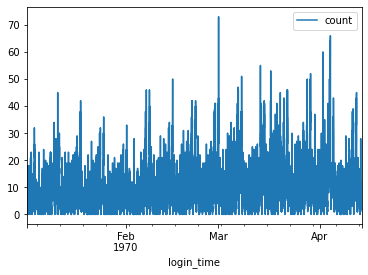

In [68]:
df_agg.plot()
plt.show()

In [69]:
#Their are very consistent spikes in usage all throughout the data

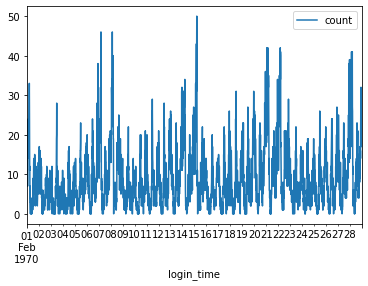

In [70]:
df_agg.loc['1970-02'].plot()
plt.show()

In [71]:
#The usage seems to be peaking around the end of every week between Saturday and Sunday.

In [72]:
#The drop at the tail end of the peaks are due to less activitey during the night.

In [73]:
#Part 2 ‐ Experiment and metrics design

In [74]:
# 1) What would you choose as the key measure of success of this experiment in
#encouraging driver partners to serve both cities, and why would you choose this metric?
# A: The key measure of success would be the differnce in amount of drivers from Gothom and Metropolis to be low and how that 
# would effect profit. Would profit be higher with drivers were equal, more in Gotham, or more in Metropolis 
# The goal of this would be to maximize the drivers in both Gotham and Metropolis to increase profit.

In [75]:
# 2) Describe a practical experiment you would design to compare the effectiveness of the
#proposed change in relation to the key measure of success. Please provide details on:

# a)How you will implement the experiment?
# A: First we would need to incentivize Gotham drivers with a lower price of toll and vice verse for Metropolis
# then remove the toll for both as a control group that would provide valuable data on driver changes

# b) What statistical test(s) you will conduct to verify the significance of the observation
# A: I would use correlation to see how the price incentives change the profit and how those changes compare to no price at all

#c) How you would interpret the results and provide recommendations to the city operations team along with any caveats.
# A: We would compare the results of the correlation for profit and the highest correlation would gain the highest recommendation

In [578]:
#Part 3 ‐ Predictive modeling

In [579]:
# 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis 
# (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [580]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

In [581]:
f = pd.read_json('ultimate_challenge/ultimate_data_challenge.json')
f

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [582]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [583]:
f.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [584]:
f.fillna(value='0')

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,0,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [585]:
f.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [586]:
f.corr()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
trips_in_first_30_days,1.000000,-0.011302,-0.001841,0.005720,0.112210,0.050388,-0.136329,-0.039115
avg_rating_of_driver,-0.011302,1.000000,-0.026189,-0.003899,-0.002086,0.014630,0.034509,0.123175
avg_surge,-0.001841,-0.026189,1.000000,0.793582,-0.078791,-0.110071,-0.081491,0.010597
surge_pct,0.005720,-0.003899,0.793582,1.000000,-0.106861,-0.144918,-0.104414,0.020103
ultimate_black_user,0.112210,-0.002086,-0.078791,-0.106861,1.000000,0.035998,0.032310,0.009343
weekday_pct,0.050388,0.014630,-0.110071,-0.144918,0.035998,1.000000,0.101652,0.020442
avg_dist,-0.136329,0.034509,-0.081491,-0.104414,0.032310,0.101652,1.000000,0.080540
avg_rating_by_driver,-0.039115,0.123175,0.010597,0.020103,0.009343,0.020442,0.080540,1.000000


In [587]:
f.last_trip_date[0]

'2014-06-17'

In [588]:
f.last_trip_date = pd.to_datetime(f.last_trip_date)
f.signup_date = pd.to_datetime(f.signup_date)

In [589]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [590]:
f['last_trip_date'].describe()

count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

In [591]:
fraction_retained = (f.last_trip_date >= '2014-06-01').sum() / (f.last_trip_date >= '2014-06-01').count()
fraction_retained

0.37608

In [592]:
f['was_retained'] = (f.last_trip_date >= '2014-06-01')*1
f.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,was_retained
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158,0.376080
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652,0.484405
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000,0.000000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000,0.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000,1.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000,1.000000


<AxesSubplot:>

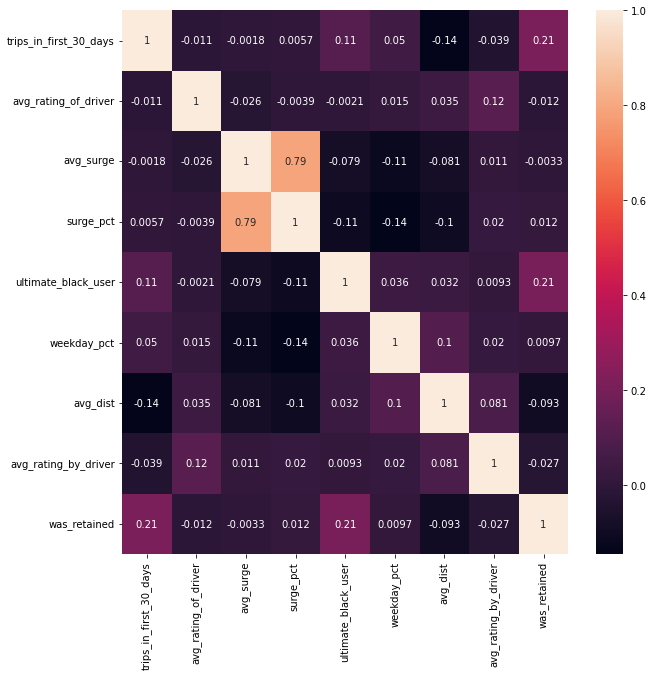

In [593]:
plt.figure(figsize=(10,10))
sns.heatmap(f.corr(), annot=True)

In [594]:
f.corr()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,was_retained
trips_in_first_30_days,1.000000,-0.011302,-0.001841,0.005720,0.112210,0.050388,-0.136329,-0.039115,0.210463
avg_rating_of_driver,-0.011302,1.000000,-0.026189,-0.003899,-0.002086,0.014630,0.034509,0.123175,-0.011653
avg_surge,-0.001841,-0.026189,1.000000,0.793582,-0.078791,-0.110071,-0.081491,0.010597,-0.003333
surge_pct,0.005720,-0.003899,0.793582,1.000000,-0.106861,-0.144918,-0.104414,0.020103,0.011797
ultimate_black_user,0.112210,-0.002086,-0.078791,-0.106861,1.000000,0.035998,0.032310,0.009343,0.205002
weekday_pct,0.050388,0.014630,-0.110071,-0.144918,0.035998,1.000000,0.101652,0.020442,0.009693
avg_dist,-0.136329,0.034509,-0.081491,-0.104414,0.032310,0.101652,1.000000,0.080540,-0.092780
avg_rating_by_driver,-0.039115,0.123175,0.010597,0.020103,0.009343,0.020442,0.080540,1.000000,-0.026791
was_retained,0.210463,-0.011653,-0.003333,0.011797,0.205002,0.009693,-0.092780,-0.026791,1.000000


In [595]:
#From the heatmap we can see the 'was_retained' was highest correlations were 'trips_in_first_30_days' and 'ultimate_black_user'
#which were very low at about 0.2 each. 

<AxesSubplot:xlabel='trips_in_first_30_days', ylabel='was_retained'>

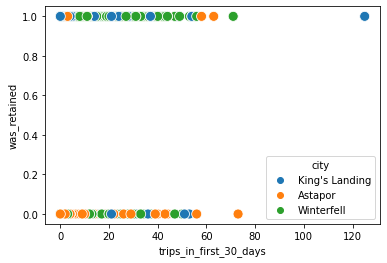

In [596]:
sns.scatterplot(x="trips_in_first_30_days", y="was_retained", data=f,s=100, hue='city')

<AxesSubplot:xlabel='ultimate_black_user', ylabel='was_retained'>

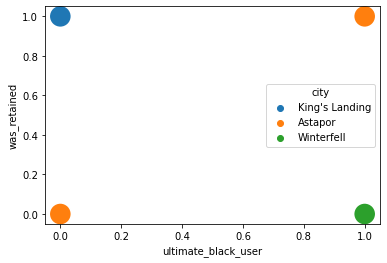

In [597]:
sns.scatterplot(x="ultimate_black_user", y="was_retained", data=f,s=500, hue='city')

array([[<AxesSubplot:title={'center':'was_retained'}>]], dtype=object)

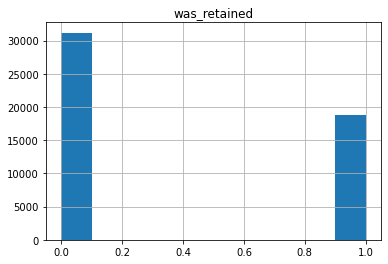

In [598]:
f.hist(column="was_retained")

In [599]:
#2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system.
#Discuss why you chose your approach, what alternatives you considered, and any concerns you have. 
#How valid is your model? Include any key indicators of model performance.

In [607]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  was_retained            50000 non-null  int32 

In [602]:
f.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'was_retained'],
      dtype='object')

In [644]:
with open('ultimate_challenge/ultimate_data_challenge.json') as f:
    data = json.load(f)
df = pd.DataFrame(data)

df['was_retained'] = (df.last_trip_date >= '2014-06-01')*1
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)
df['signup_date'] = df['signup_date'].dt.strftime('%Y%m%d').astype(int) - 20140100
df['last_trip_date'] = (df['last_trip_date'] - min(df['last_trip_date'])).dt.days + 1 

In [645]:
df=df.fillna(value='0')

In [646]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  int32  
 3   avg_rating_of_driver    50000 non-null  object 
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  int64  
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  object 
 12  was_retained            50000 non-null  int32  
dtypes: bool(1), float64(4), int32(2), int64(2), object(4)
memory usage: 4.2+ MB


In [647]:
df['ultimate_black_user'] = df['ultimate_black_user']*1

In [648]:
df.describe()

,trips_in_first_30_days,signup_date,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,was_retained
count,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,2.278200,16.54468,1.074764,109.334780,8.849536,0.37708,60.926084,5.796827,0.376080
std,3.792684,8.75422,0.222336,61.718985,19.958811,0.48466,37.081503,5.707357,0.484405
min,0.000000,1.00000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,9.00000,1.000000,45.000000,0.000000,0.00000,33.300000,2.420000,0.000000
50%,1.000000,17.00000,1.000000,128.000000,0.000000,0.00000,66.700000,3.880000,0.000000
75%,3.000000,24.00000,1.050000,169.000000,8.600000,1.00000,100.000000,6.940000,1.000000
max,125.000000,31.00000,8.000000,182.000000,100.000000,1.00000,100.000000,160.960000,1.000000


In [649]:
#Regression

In [812]:
X= df.drop(['city','phone',"was_retained"],axis=1)
y=df["was_retained"]

In [813]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [814]:
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [815]:
reg.score(X_train,y_train)

0.6219316547260336

In [767]:
#Classifier

In [768]:
dfo1=df.select_dtypes(include=['object'])
dfo1

,city,avg_rating_of_driver,phone,avg_rating_by_driver
0,King's Landing,4.7,iPhone,5.0
1,Astapor,5.0,Android,5.0
2,Astapor,4.3,iPhone,5.0
3,King's Landing,4.6,iPhone,4.9
4,Winterfell,4.4,Android,4.9
...,...,...,...,...
49995,King's Landing,5.0,iPhone,4.2
49996,Astapor,0,iPhone,4.0
49997,Winterfell,5.0,Android,5.0
49998,Astapor,3.0,iPhone,3.5


In [769]:
df['ultimate_black_user'] = df['ultimate_black_user']*1

In [796]:
#Phone as classifier

In [797]:
X1= df.drop(['phone'],axis=1)
y1=df['phone']

In [798]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=.43, random_state=1)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [799]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy')
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [800]:
rfc.score(X_test,y_test)

0.6699069767441861

In [801]:
y_pred_rf=rfc.predict(X_test)

In [802]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.14      0.01      0.01       183
     Android       0.39      0.17      0.24      6347
      iPhone       0.71      0.89      0.79     14970

    accuracy                           0.67     21500
   macro avg       0.42      0.36      0.35     21500
weighted avg       0.61      0.67      0.62     21500



In [777]:
#The classification report shows that iPhone users are easier to predict based on the given data 

In [778]:
#City as Classifier

In [779]:
X1= df.drop(['city'],axis=1)
y1=df['city']

In [780]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=.43, random_state=1)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [781]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy')
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [782]:
rfc.score(X_test,y_test)

0.5013488372093023

In [783]:
y_pred_rf=rfc.predict(X_test)

In [784]:
print(classification_report(y_test,y_pred_rf))

                precision    recall  f1-score   support

       Astapor       0.44      0.36      0.40      7104
King's Landing       0.47      0.37      0.42      4373
    Winterfell       0.54      0.66      0.59     10023

      accuracy                           0.50     21500
     macro avg       0.48      0.46      0.47     21500
  weighted avg       0.49      0.50      0.49     21500



In [785]:
#The classification report shows Winterfell is easier to predict compared to Astapor and King's Landing

In [786]:
# 3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention 
#(again, a few sentences will suffice)

In [ ]:
 #A The EDA showed very low correlation with the data and user retention, but when all pooled together the predictive power
# is around 60% instead of the 20% and below of each individually.
# The random forest classifer for cities has an easier time predicting people from Winterfell rather than 
# King's Landing or Astapor.
# The random forst classifier for phones was more accurate across the board for iPhones compared to Androids
# The main thing we can leverage out of this is that the location and the type of phone has a huge influence on user retention,
# iPhone users in Winterfell have a big influence on user retention